In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import numpy as np

X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_train = tf.image.resize(X_train, [32, 32])
X_test = tf.image.resize(X_test, [32, 32])

In [7]:
X_train = X_train.numpy()
X_test = X_test.numpy()

In [8]:
X_train.shape

(60000, 32, 32, 1)

In [9]:
X_test.shape

(10000, 32, 32, 1)

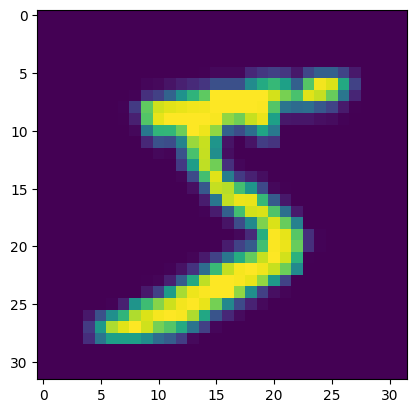

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [11]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [12]:
X_train[0]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [13]:
from keras import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(
    filters = 6,
    kernel_size = (5, 5),
    padding = 'valid',
    activation = 'tanh',
    input_shape = (32, 32, 1)
))
model.add(AveragePooling2D(
    pool_size = (2, 2),
    strides = 2,
    padding = 'valid'
))


model.add(Conv2D(
    filters = 16,
    kernel_size = (5, 5),
    padding = 'valid',
    activation = 'tanh'
))
model.add(AveragePooling2D(
    pool_size = (2, 2),
    strides = 2,
    padding = 'valid'
))

model.add(Flatten())

model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))

model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8861 - loss: 0.3928 - val_accuracy: 0.9652 - val_loss: 0.1083
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9704 - loss: 0.0957 - val_accuracy: 0.9730 - val_loss: 0.0877
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0637 - val_accuracy: 0.9783 - val_loss: 0.0700
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0504 - val_accuracy: 0.9808 - val_loss: 0.0571
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0390 - val_accuracy: 0.9817 - val_loss: 0.0601
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9848 - val_loss: 0.0462
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9924 - loss:

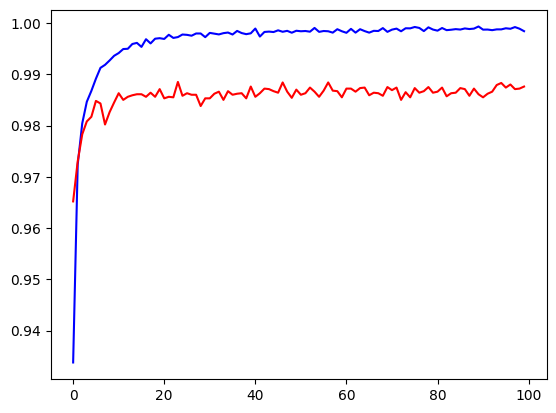

In [18]:
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')

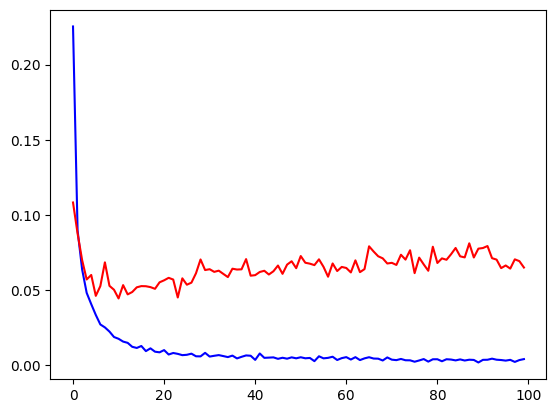

In [19]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')